In [ ]:
# Loading data
import pandas as pd
import seaborn as sns
import regex as re
from typing import Tuple

train_tokens = pd.read_csv("/kaggle/input/extracting-features-with-spacy/training_with_tokens.csv")
test_tokens = pd.read_csv("/kaggle/input/extracting-features-with-spacy/test_with_tokens.csv")

LEN_VECTOR = 300  # Length of the token vectors
token_vectors = [f"avg_token_vector_{i}" for i in range(LEN_VECTOR)]

train_tokens.head()

,article_id,file_id,text,is_real,avg_token_vector_0,avg_token_vector_1,avg_token_vector_2,avg_token_vector_3,avg_token_vector_4,avg_token_vector_5,...,avg_token_vector_290,avg_token_vector_291,avg_token_vector_292,avg_token_vector_293,avg_token_vector_294,avg_token_vector_295,avg_token_vector_296,avg_token_vector_297,avg_token_vector_298,avg_token_vector_299
0,94,2,The new detector system was first tested on 30...,0,-0.077769,0.252392,-0.014818,-0.000713,-0.141581,0.045727,...,-0.184035,0.122638,0.152933,0.055888,0.149450,-0.070476,-0.061196,0.024034,-0.012061,0.133580
1,94,1,The new detector system was first tested on 30...,1,-0.074893,0.262910,-0.030370,-0.002416,-0.104175,0.058519,...,-0.171178,0.102983,0.131961,0.046443,0.140925,-0.070780,-0.061558,0.028634,-0.027038,0.107565
2,93,2,The observations of the Pluto-Charon binary an...,1,0.022929,0.105878,-0.012680,0.036975,0.006194,0.201155,...,-0.040706,-0.020288,0.014817,0.115498,0.196464,0.038277,-0.001662,0.040387,-0.037965,0.112413
3,93,1,The observations of the Pluto-Charon system an...,0,0.032472,0.140410,-0.007820,0.031820,-0.014877,0.143297,...,-0.073805,-0.017368,0.045915,0.107447,0.164487,0.033983,-0.002963,0.016147,-0.001357,0.065037
4,92,2,FORS1 and FORS2 are early instruments of the V...,1,-0.139084,0.078683,-0.013101,-0.015956,-0.091714,0.057531,...,-0.270561,0.105031,0.093740,0.094304,0.067767,-0.002802,0.062450,-0.047142,-0.030050,0.081389


In [2]:
def count_none_latin_letters(text):
    # Search for things that are NOT
    # \p{Latin} Latin letters
    # \s empty spaces
    # \p{S} Symbols
    # \p{P} Punitions
    # \p{N} Numbers
    # \p{Greek} greek letters (boy do scientists love themselves some greek letters)
    # \µ for some reason µ is not part of \p{Greek}? Weird
    return len(re.findall(r"[^\p{Latin}\s\p{S}\p{P}\p{N}\p{Greek}\µ]+", text))

In [27]:
def repeats_word_three_times(text: str) -> Tuple[bool, list]:
    repeating_phrases = re.findall(r"([^\w].{4,})\1+", text.lower())
    if len(repeating_phrases) > 0:
        return True, repeating_phrases
    else:
        return False, []

In [29]:
def preprocess_dataset(dataset: pd.DataFrame):
    dataset.loc[:, "is_empty"] = pd.Series([False] * len(dataset), dtype=bool)
    dataset.loc[:, "has_weird_letters"] = pd.Series([False] * len(dataset), dtype=bool)
    dataset.loc[:, "repeated_word"] = pd.Series([False] * len(dataset), dtype=object)

    for i, row in dataset.iterrows():
        text = row["text"]
        # Empty strings are fake
        if pd.isna(text) or len(text) == 0:
            dataset.loc[i, "is_empty"] = True
            continue
        else:
            dataset.loc[i, "is_empty"] = False

        # Did you use weird letters
        # If both are the same we continue
        count1 = count_none_latin_letters(text)
        dataset.loc[i, "has_weird_letters"] = count1 > 0

        # Repeating words
        # If you repeat a word more then 3 and it is the most repeated
        repeats_1 = repeats_word_three_times(text)
        dataset.loc[i, "repeated_word"] = repeats_1[0]

preprocess_dataset(train_tokens)
preprocess_dataset(test_tokens)
train_tokens.head()

,article_id,file_id,text,is_real,avg_token_vector_0,avg_token_vector_1,avg_token_vector_2,avg_token_vector_3,avg_token_vector_4,avg_token_vector_5,...,avg_token_vector_293,avg_token_vector_294,avg_token_vector_295,avg_token_vector_296,avg_token_vector_297,avg_token_vector_298,avg_token_vector_299,is_empty,has_weird_letters,repeated_word
0,94,2,The new detector system was first tested on 30...,0,-0.077769,0.252392,-0.014818,-0.000713,-0.141581,0.045727,...,0.055888,0.149450,-0.070476,-0.061196,0.024034,-0.012061,0.133580,False,False,False
1,94,1,The new detector system was first tested on 30...,1,-0.074893,0.262910,-0.030370,-0.002416,-0.104175,0.058519,...,0.046443,0.140925,-0.070780,-0.061558,0.028634,-0.027038,0.107565,False,False,False
2,93,2,The observations of the Pluto-Charon binary an...,1,0.022929,0.105878,-0.012680,0.036975,0.006194,0.201155,...,0.115498,0.196464,0.038277,-0.001662,0.040387,-0.037965,0.112413,False,False,False
3,93,1,The observations of the Pluto-Charon system an...,0,0.032472,0.140410,-0.007820,0.031820,-0.014877,0.143297,...,0.107447,0.164487,0.033983,-0.002963,0.016147,-0.001357,0.065037,False,False,False
4,92,2,FORS1 and FORS2 are early instruments of the V...,1,-0.139084,0.078683,-0.013101,-0.015956,-0.091714,0.057531,...,0.094304,0.067767,-0.002802,0.062450,-0.047142,-0.030050,0.081389,False,False,False


Text(0.5, 1.0, 'PCA Projection with Weird Letters Highlighted')

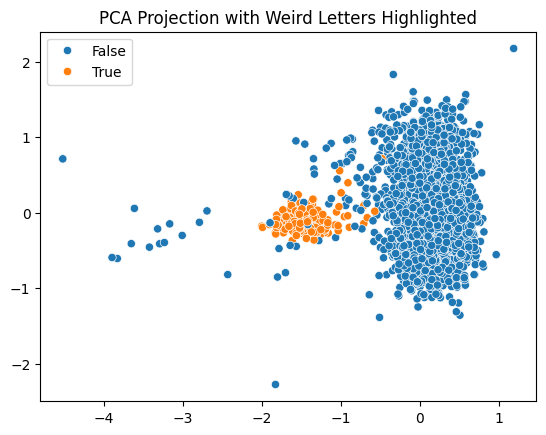

In [31]:
from sklearn.decomposition import PCA

train_x = train_tokens[token_vectors]
test_x = test_tokens[token_vectors]

all_reduced = PCA(n_components=4).fit_transform(pd.concat([test_x, train_x]))
train_reduced = all_reduced[: len(train_x)]
test_reduced = all_reduced[len(train_x) :]

ax = sns.scatterplot(
    x=all_reduced[:, 0],
    y=all_reduced[:, 1],
    hue=list(test_tokens.has_weird_letters) + list(train_tokens.has_weird_letters),
)
ax.set_title("PCA Projection with Weird Letters Highlighted")

Text(0.5, 1.0, 'PCA Projection with Empty Strings Highlighted')

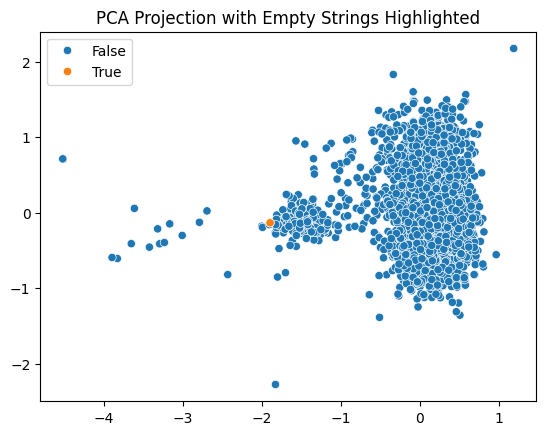

In [32]:
ax = sns.scatterplot(
    x=all_reduced[:, 0],
    y=all_reduced[:, 1],
    hue=list(test_tokens.is_empty) + list(train_tokens.is_empty),
)
ax.set_title("PCA Projection with Empty Strings Highlighted")

Text(0.5, 1.0, 'PCA Projection with Repeated Words Highlighted')

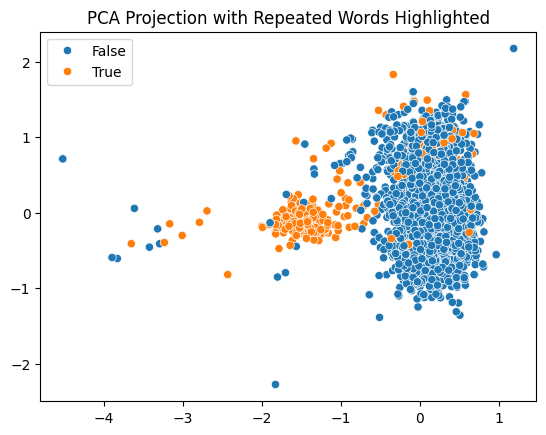

In [33]:
ax = sns.scatterplot(
    x=all_reduced[:, 0],
    y=all_reduced[:, 1],
    hue=list(test_tokens.repeated_word) + list(train_tokens.repeated_word),
)
ax.set_title("PCA Projection with Repeated Words Highlighted")

# Umap

In [34]:
import umap

embedding = umap.UMAP().fit_transform(pd.concat([test_x, train_x]))

Text(0.5, 1.0, 'PCA Projection with is_empty Highlighted')

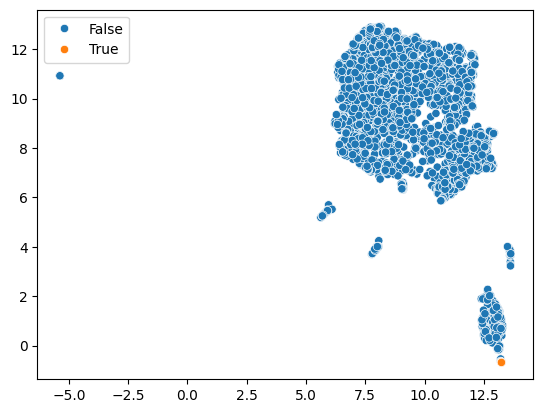

In [ ]:
sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=list(test_tokens.is_empty) + list(train_tokens.is_empty),
)
ax.set_title("UMAP Projection with is_empty Highlighted")

Text(0.5, 1.0, 'PCA Projection with has_weird_letters Highlighted')

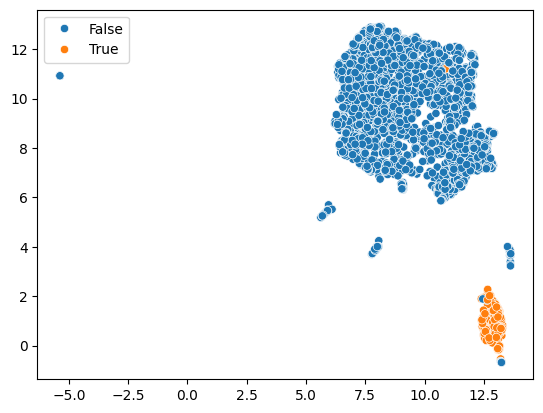

In [ ]:
sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=list(test_tokens.has_weird_letters) + list(train_tokens.has_weird_letters),
)
ax.set_title("UMAP Projection with has_weird_letters Highlighted")

Text(0.5, 1.0, 'PCA Projection with Repeated Words Highlighted')

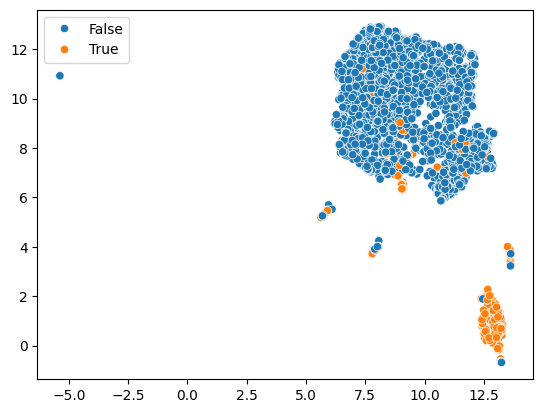

In [ ]:
sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=list(test_tokens.repeated_word) + list(train_tokens.repeated_word),
)
ax.set_title("UMAP Projection with Repeated Words Highlighted")

# Umap with filters

In [48]:
train_filtered = train_tokens.loc[(train_tokens.is_empty == False) & (train_tokens.has_weird_letters == False) & (train_tokens.repeated_word == False)]
test_filtered = test_tokens.loc[(test_tokens.is_empty == False) & (test_tokens.has_weird_letters == False) & (test_tokens.repeated_word == False)]

train_x = train_filtered[token_vectors]
test_x = test_filtered[token_vectors]

train_x

,avg_token_vector_0,avg_token_vector_1,avg_token_vector_2,avg_token_vector_3,avg_token_vector_4,avg_token_vector_5,avg_token_vector_6,avg_token_vector_7,avg_token_vector_8,avg_token_vector_9,...,avg_token_vector_290,avg_token_vector_291,avg_token_vector_292,avg_token_vector_293,avg_token_vector_294,avg_token_vector_295,avg_token_vector_296,avg_token_vector_297,avg_token_vector_298,avg_token_vector_299
0,-0.077769,0.252392,-0.014818,-0.000713,-0.141581,0.045727,-0.075624,0.060064,-0.024731,1.022085,...,-0.184035,0.122638,0.152933,0.055888,0.149450,-0.070476,-0.061196,0.024034,-0.012061,0.133580
1,-0.074893,0.262910,-0.030370,-0.002416,-0.104175,0.058519,-0.068261,0.062908,-0.011515,1.045446,...,-0.171178,0.102983,0.131961,0.046443,0.140925,-0.070780,-0.061558,0.028634,-0.027038,0.107565
2,0.022929,0.105878,-0.012680,0.036975,0.006194,0.201155,0.069242,0.084979,0.025001,0.112522,...,-0.040706,-0.020288,0.014817,0.115498,0.196464,0.038277,-0.001662,0.040387,-0.037965,0.112413
3,0.032472,0.140410,-0.007820,0.031820,-0.014877,0.143297,0.041130,0.047697,0.029948,0.334427,...,-0.073805,-0.017368,0.045915,0.107447,0.164487,0.033983,-0.002963,0.016147,-0.001357,0.065037
4,-0.139084,0.078683,-0.013101,-0.015956,-0.091714,0.057531,-0.052179,0.062101,0.072817,0.985361,...,-0.270561,0.105031,0.093740,0.094304,0.067767,-0.002802,0.062450,-0.047142,-0.030050,0.081389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,-0.061570,-0.033860,-0.130489,-0.017093,-0.046630,-0.014506,-0.075381,0.233222,0.055826,1.753896,...,-0.278507,0.129938,0.103743,0.036731,0.030300,0.044632,-0.027404,0.077588,-0.022169,0.128585
186,-0.145796,0.243684,-0.040223,0.054885,-0.067390,0.113923,0.002337,0.238505,-0.058739,1.261217,...,-0.237792,0.122424,0.019206,0.077992,0.071437,-0.081587,-0.130437,-0.010399,0.007265,0.057331
187,-0.127614,0.192543,-0.158242,0.008621,-0.127883,0.093016,-0.004616,0.145364,0.002562,1.880057,...,-0.275112,0.154954,0.010085,0.059518,0.079739,-0.046888,-0.157317,-0.033193,0.032242,0.040655
188,-0.057491,-0.011775,-0.044935,0.007019,-0.007547,0.146369,-0.152678,0.149214,-0.040103,1.577992,...,-0.279727,0.098711,0.121289,0.079265,0.034582,-0.018412,-0.050719,-0.043971,-0.026678,0.104003


In [46]:
import umap

embedding = umap.UMAP().fit_transform(pd.concat([test_x, train_x]))

Text(0.5, 1.0, 'UMAP Projection with Repeated Words Highlighted')

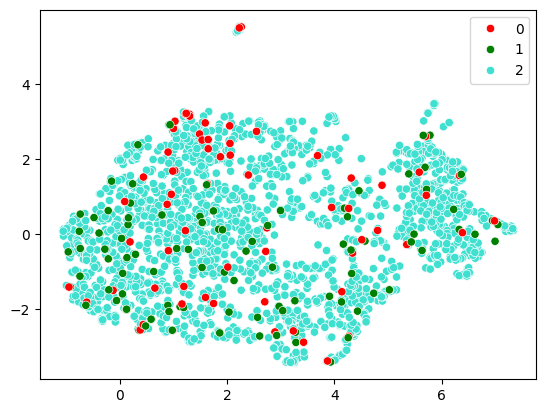

In [53]:
sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=[2] * len(test_filtered) + list(train_filtered.is_real),
    palette={0: "red", 1: "green", 2: "turquoise"}
)
ax.set_title("UMAP Projection with Repeated Words Highlighted")